In [1]:
%matplotlib inline
import pandas as pd
import plot_analysis as pa
import seaborn as sns
import numpy as np
import os

In [2]:
if (not os.path.exists('img')):
    os.mkdir("img")

#data folder inside the folder dataset for model creation
IMG_PATH = r'img'
#data folder inside the current folder
DATA_PATH = r'../data'

In [3]:
df = pd.read_csv(os.path.join(DATA_PATH,'for_the_model_2017_2018.csv'))

## Distribution of Gazzetta Marks

As it is possible to notice, the Gazzetta Marks, has a clear distribution.

Its mean is around 6 and the variance is close to 3 units of differences. It presents an high percentage of 5.5 and 6.5.

Marks above 5.5 and over 7.5 are quite rare

AttributeError: 'Rectangle' object has no property 'normed'

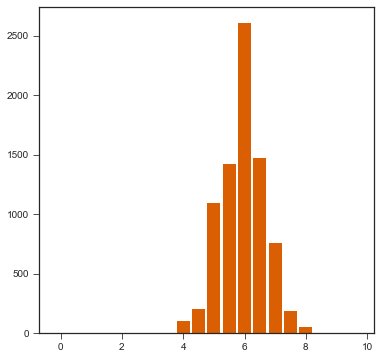

In [4]:
pa.plotGazzettaDistribution(df.gazzetta_score, df.corriere_score, df.tuttosport_score, df.fantacalcio_score)

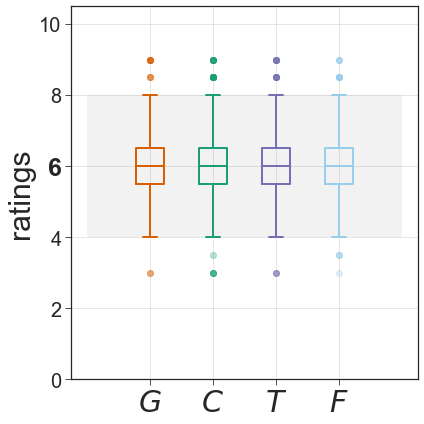

one_way ANOVA:  4.294797598476378 0.004898915157895432
31684 31684
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2     0.0334   0.0041  0.0627  True 
  1      3    -0.0011  -0.0304  0.0282 False 
  1      4     0.0012  -0.0281  0.0305 False 
  2      3    -0.0345  -0.0638 -0.0052  True 
  2      4    -0.0322  -0.0615 -0.0029  True 
  3      4     0.0023   -0.027  0.0316 False 
---------------------------------------------


In [5]:
pa.plotBoxplotNewspaperDistribution(df.gazzetta_score, df.corriere_score, df.tuttosport_score, df.fantacalcio_score)

## Violin Plot Distribution of Marks

Each line inside the violin plot represent a newspaper. As it possible to notice from the legend we plot in different colour:
1. Gazzetta dello Sport -> orange
2. Corriere dello Sport -> green
3. Tuttosport -> violet
4. Fantacalcio -> light blue

The first three newspaper, more or less, follows the same distribution, probably because between phisical newspaper the criteria to judge a player are similar.

The last one, Fantacalcio, has a different distribution; all 4 of them have a peak nearly 6, but Fantacalcio also has high peaks around 5.5 and 6.5. This situation probably is influenced by the fact that fantagazzetta is more focused on Fantacalcio game and their methods of judging is more driven by the game instead by the performance. 

0.024975802718511974


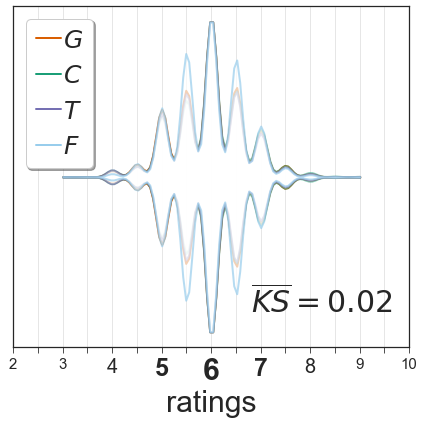

In [6]:
pa.plotViolinPlotNewspaperDistribution(df.gazzetta_score, df.corriere_score, df.tuttosport_score, df.fantacalcio_score)

[0.52182432 0.11390859 0.37873604 ... 0.01062025 0.50641589 0.50641589]


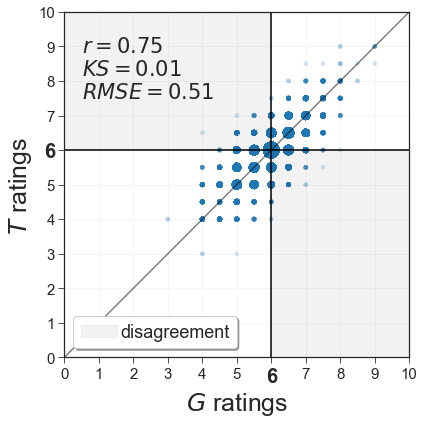

In [9]:
concordance = None
pa.correlation_newspapers(df.gazzetta_score, df.tuttosport_score, 'gazzetta', 'tuttosport', plot_type='scatter', concordance=concordance)

[1.81369336 0.54176371 0.00952823 ... 0.1696517  0.40708367 0.40708367]


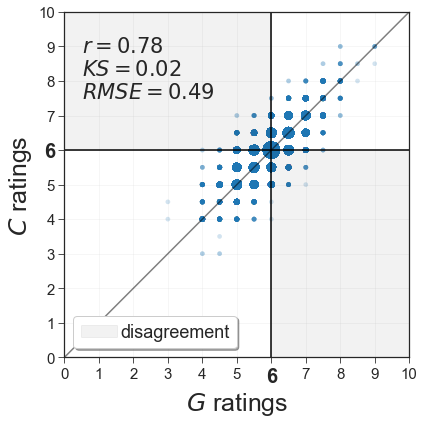

In [10]:
pa.correlation_newspapers(df.gazzetta_score, df.corriere_score, 'gazzetta', 'corriere', plot_type='scatter', concordance=concordance)

[1.42730779 0.50602961 0.34077791 ... 0.01559301 0.52027294 0.52027294]


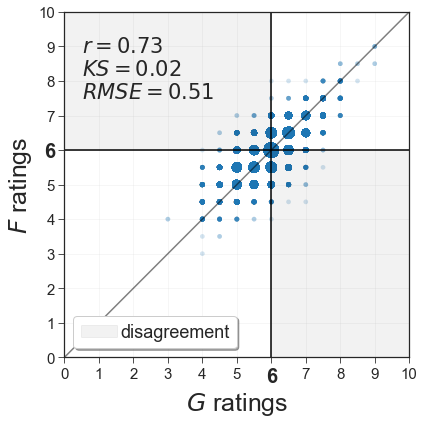

In [11]:
pa.correlation_newspapers(df.gazzetta_score, df.fantacalcio_score, 'gazzetta', 'fantagazzetta', plot_type='scatter', concordance=concordance)

[0.60160064 0.60160064 0.03343851 ... 0.09846695 0.35763498 0.35763498]


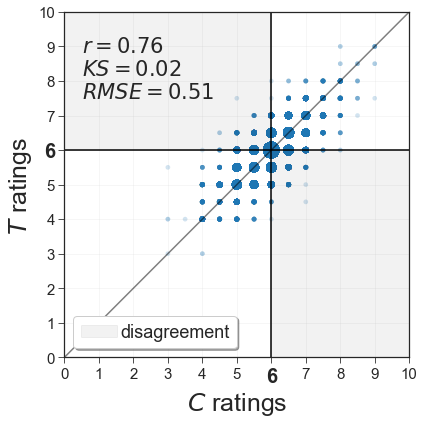

In [12]:
pa.correlation_newspapers(df.corriere_score, df.tuttosport_score, 'corriere', 'tuttosport', plot_type='scatter', concordance=concordance)

[1.37788012 1.37788012 0.03794026 ... 0.09269828 0.59689938 0.59689938]


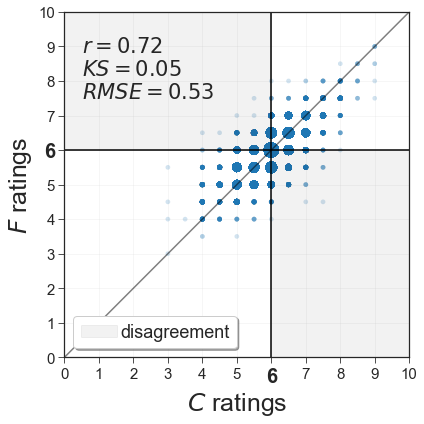

In [13]:
pa.correlation_newspapers(df.corriere_score, df.fantacalcio_score, 'corriere', 'fantagazzetta', plot_type='scatter', concordance=concordance)

[0.50328708 0.50328708 0.44818942 ... 0.04581952 0.45135607 0.45135607]


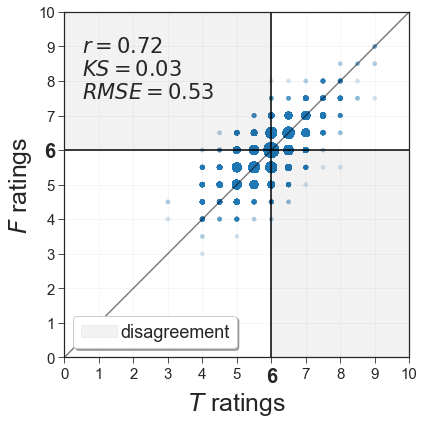

In [14]:
pa.correlation_newspapers(df.tuttosport_score, df.fantacalcio_score, 'tuttosport', 'fantagazzetta', plot_type='scatter', concordance=concordance)

## Marks distribution analyzed by Role
Since Gazzetta, Corriere and Tuttosport share more or less the same distribution, in this script we will analyzed only the difference between Gazzetta distribution and Fantagazzetta distribution.

Is possible to clearly notice some differences w.r.t. the total mark distribution:

1. Forward player, but also midfielder, has an high probability to score a mark close to 6 but also to 5.5. This immediately suggest us that if a forward doesn't score a goal, has an high probability to take low marks.
2. Fantacalcio forward has higher peak in 5.5 w.r.t. 6.
3. Forward and Goalkeeper has an higher probabilty to score ratings higher than 6.5. This is because they are the ones that, with more probability could make an importan action for the final result.

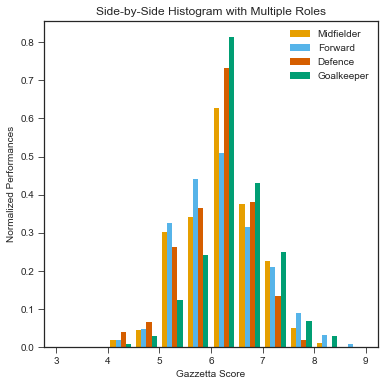

In [15]:
#make a separate list of ratings for each role
midfielderGazzetta = list(df[df['player_role_newspaper'] == 'C']['gazzetta_score'])
forwardGazzetta = list(df[df['player_role_newspaper'] == 'A']['gazzetta_score'])
defenceGazzetta = list(df[df['player_role_newspaper'] == 'D']['gazzetta_score'])
goalkeeperGazzetta = list(df[df['player_role_newspaper'] == 'P']['gazzetta_score'])

pa.plotHistogramRoleMarkDistribution(midfielderGazzetta,forwardGazzetta, defenceGazzetta, goalkeeperGazzetta, 'Gazzetta Score')

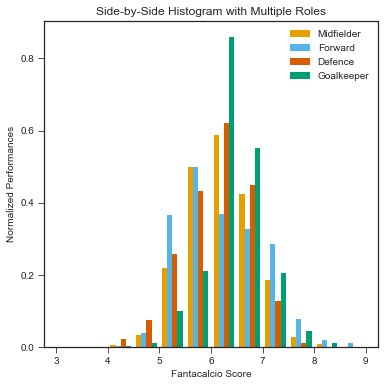

In [16]:
#make a separate list of ratings for each role
midfielderFanta = list(df[df['player_role_fantacalcio'] == 'C']['fantacalcio_score'])
forwardFanta = list(df[df['player_role_fantacalcio'] == 'A']['fantacalcio_score'])
defenceFanta = list(df[df['player_role_fantacalcio'] == 'D']['fantacalcio_score'])
goalkeeperFanta = list(df[df['player_role_fantacalcio'] == 'P']['fantacalcio_score'])

pa.plotHistogramRoleMarkDistribution(midfielderFanta, forwardFanta, defenceFanta, goalkeeperFanta, 'Fantacalcio Score')

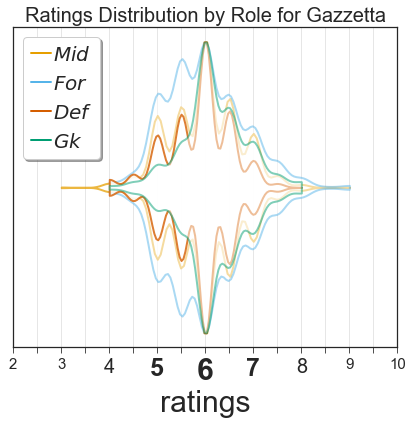

In [17]:
pa.plotViolinPlotRolesMarkDistribution(midfielderGazzetta, forwardGazzetta, defenceGazzetta, goalkeeperGazzetta, 'Gazzetta')

## Correlation between Player rank and Gazzetta score

Correlation 0.06266988032007657


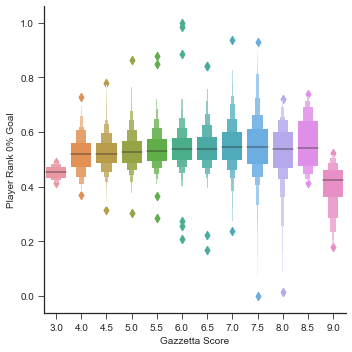

In [18]:
withoutRatings = df.copy(deep=True)
withoutRatings = withoutRatings.dropna(how='any',axis=0) 

ax = sns.catplot(x="gazzetta_score", y="ratings_total_alpha", kind='boxen',
            data=withoutRatings)
ax.set(xlabel='Gazzetta Score', ylabel='Player Rank 0% Goal')
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_total_alpha)[0][1]))

Correlation 0.3528831072595512


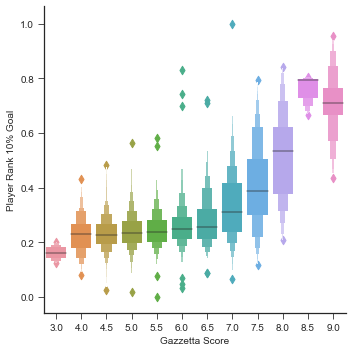

In [19]:
ax = sns.catplot(x="gazzetta_score", y="ratings_9", kind='boxen',
            data=withoutRatings)
ax.set(xlabel='Gazzetta Score', ylabel='Player Rank 10% Goal')
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_9)[0][1]))

Correlation 0.4482677306991975


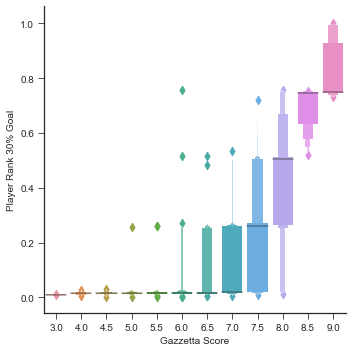

In [20]:
ax = sns.catplot(x="gazzetta_score", y="ratings_3", kind='boxen',
            data=withoutRatings)
ax.set(xlabel='Gazzetta Score', ylabel='Player Rank 30% Goal')
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_3)[0][1]))

Correlation 0.44511877807343153


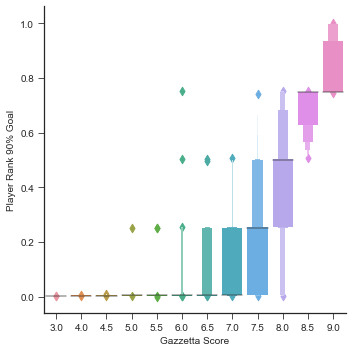

In [21]:
ax = sns.catplot(x="gazzetta_score", y="ratings", kind='boxen',
            data=withoutRatings)
ax.set(xlabel='Gazzetta Score', ylabel='Player Rank 90% Goal')
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings)[0][1]))

## Boxplot to put in relation victory with final mark

This boxplot aim to figure out if the victory of the team influence the final evaluation fo the individual; The answer is yes, is possible to notice from yellow boxes (winning ones) that the average mark value is 6.5.
Instead from the blu boxes (not winning ones) the average values are 5.5 and 6.0. 
This discrepancy suggest us that final indiviudal mark is influenced by the team result and also that the victory is one of the key criteria to decide a individual rating.

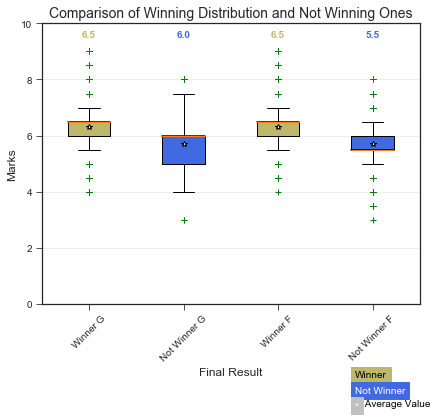

In [22]:
wingazzetta = df[df['winner'] == 1]['gazzetta_score']
notwingazzetta = df[df['winner'] == 0]['gazzetta_score']

winfanta = df[df['winner'] == 1]['fantacalcio_score']
notwinfanta = df[df['winner'] == 0]['fantacalcio_score']

pa.boxplotCorrelationWinFinalMark(wingazzetta, notwingazzetta, winfanta, notwinfanta)

In [23]:
pa.computeChiSquareTest(df.winner, df.gazzetta_score, 'Winner', 'Score Gazzetta')

contingency_table :-
 Score Gazzetta  3.0  4.0  4.5  5.0   5.5   6.0  6.5  7.0  7.5  8.0  8.5  9.0
Winner                                                                      
0                 2   93  195  968  1107  1533  648  198   35   10    0    0
1                 0    7   10  131   317  1078  822  562  153   43    3    6
Observed Values :-
 [[   2   93  195  968 1107 1533  648  198   35   10    0    0]
 [   0    7   10  131  317 1078  822  562  153   43    3    6]]
Expected Values :-
 [[1.20919076e+00 6.04595379e+01 1.23942053e+02 6.64450322e+02
  8.60943820e+02 1.57859854e+03 8.88755208e+02 4.59492488e+02
  1.13663931e+02 3.20435551e+01 1.81378614e+00 3.62757228e+00]
 [7.90809241e-01 3.95404621e+01 8.10579472e+01 4.34549678e+02
  5.63056180e+02 1.03240146e+03 5.81244792e+02 3.00507512e+02
  7.43360687e+01 2.09564449e+01 1.18621386e+00 2.37242772e+00]]
Degree of Freedom:- 1
chi-square statistic:- 45.60158604275391
critical_value: 3.841458820694124
p-value: 1.4492407274246943e-11

In [24]:
pa.computeChiSquareTest(df.winner, df.fantacalcio_score, 'Winner', 'Score Fantacalcio')

contingency_table :-
 Score Fantacalcio  3.0  3.5  4.0  4.5  5.0   5.5   6.0  6.5  7.0  7.5  8.0  \
Winner                                                                       
0                    1    3   45  181  871  1409  1334  720  203   19    3   
1                    0    0    1   10  120   378   971  973  526  113   29   

Score Fantacalcio  8.5  9.0  
Winner                       
0                    0    0  
1                    7    4  
Observed Values :-
 [[   1    3   45  181  871 1409 1334  720  203   19    3    0    0]
 [   0    0    1   10  120  378  971  973  526  113   29    7    4]]
Expected Values :-
 [[6.04595379e-01 1.81378614e+00 2.78113875e+01 1.15477717e+02
  5.99154021e+02 1.08041194e+03 1.39359235e+03 1.02357998e+03
  4.40750032e+02 7.98065901e+01 1.93470521e+01 4.23216766e+00
  2.41838152e+00]
 [3.95404621e-01 1.18621386e+00 1.81886125e+01 7.55222825e+01
  3.91845979e+02 7.06588057e+02 9.11407651e+02 6.69420023e+02
  2.88249968e+02 5.21934099e+01 1.265294

In [25]:
pa.computeChiSquareTest(pd.qcut(df['contextual_expecatition'], q=20), df.gazzetta_score, 'Bet', 'Score Gazzetta')

contingency_table :-
 Score Gazzetta              3.0  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  \
Bet                                                                            
(1.0590000000000002, 1.16]    0    2    7   42   55  140   79   65   20    5   
(1.16, 1.25]                  0    2    6   46   55  167  114   71   16   10   
(1.25, 1.33]                  0    9   11   42   56  109   76   34   13    2   
(1.33, 1.44]                  0    6    6   42   91  225  125   73   19    7   
(1.44, 1.5]                   0    7    6   31   40   93   48   30    8    0   
(1.5, 1.6]                    0    3    6   26   50  101   55   42   14    1   
(1.6, 1.72]                   0    2    7   36   54  162   67   61    6    6   
(1.72, 1.85]                  0    4    8   67   74  150   81   33   12    2   
(1.85, 2.0]                   1    2    8   67   66  105   68   29    5    1   
(2.0, 2.2]                    1    5    5   43   97  153   87   50    5    2   
(2.2, 2.37]       

Correlation -0.1685747707799685


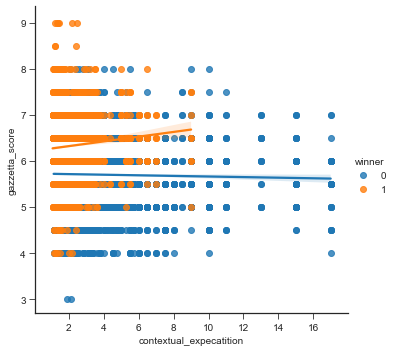

In [26]:
sns.lmplot(x="contextual_expecatition", y="gazzetta_score", hue="winner", data=df)
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.contextual_expecatition)[0][1]))

## Correlation between Assist/Goal with Marks
Concerning the assist feature, the correlation is coherent, since it is an active participation to goal, with a human perception of player performance. 
Moreover, this is more visible in the goal correlation. Goals are the most important event inside a game; they are the ones that determine the final result and the player who scored one is seen from an outsider as a player that contributes to winning. 
A strange behavior is visible only in assist correlation since defense performance depend slightly less than other position to the assist technical feature (probably because defense player are evaluated from human to other different metrics).

Correlation 0.22496762911137724


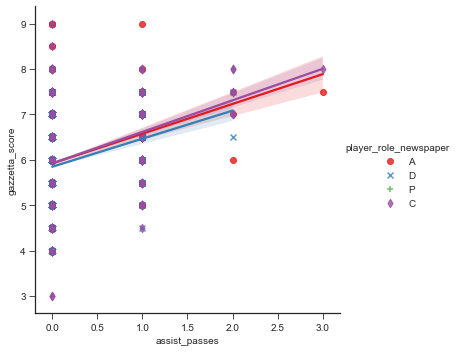

In [27]:
sns.lmplot(x="assist_passes", y="gazzetta_score", hue="player_role_newspaper", data=df,
           markers=["o", "x", "+", "d"], palette="Set1");
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.assist_passes)[0][1]))

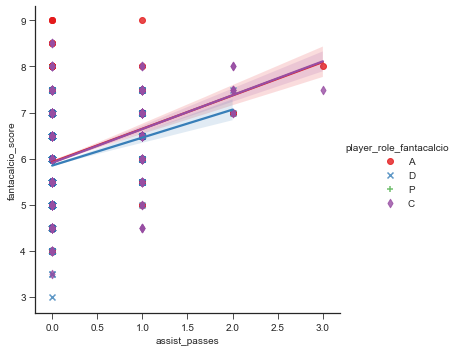

In [28]:
sns.lmplot(x="assist_passes", y="fantacalcio_score", hue="player_role_fantacalcio", data=df,
           markers=["o", "x", "+", "d"], palette="Set1");

Correlation 0.4433526728739547


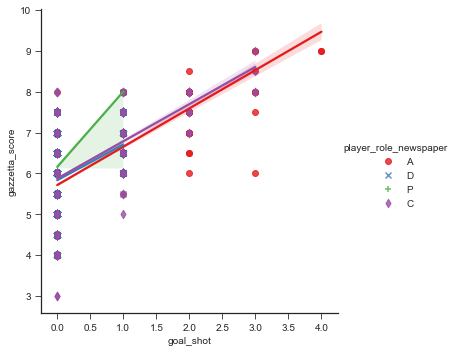

In [29]:
sns.lmplot(x="goal_shot", y="gazzetta_score", hue="player_role_newspaper", data=df,
           markers=["o", "x", "+", "d"], palette="Set1");
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.goal_shot)[0][1]))

## Player Evolution During Gamesweek

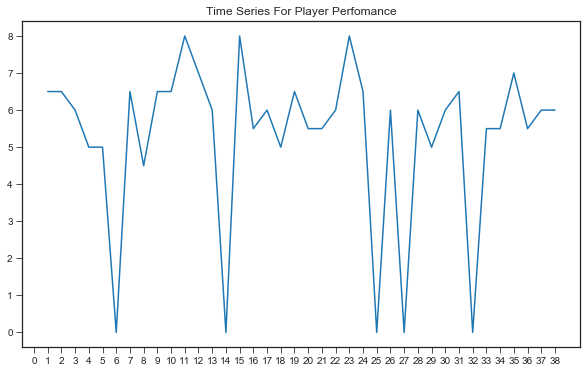

In [30]:
metrics = 'GAZZETTA'
series = pa.createDataframeForMarkEvolution(df, metrics)
series[3323].plot(figsize=(10,6), xticks=range(0, 39), legend = False, title = 'Time Series For Player Perfomance')

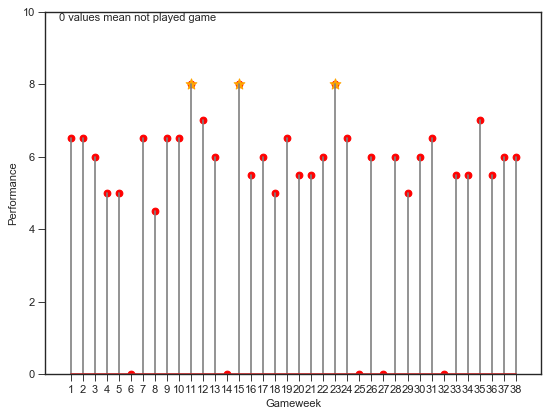

In [31]:
pa.scatterPlayerEvolution(series, 3323)

## Test Randomicity of Best Performance (GAZZETTA SCORE PART)

Foe the all players, we divided them into 3 different categories:
1. High Perfomance Players: those that have scored during the season at least a 8 as mark
2. Low Perfomance Players: those player that during season has scored at least a 4 as mark
3. Mid Perfomance Players: those players that didn't exeed the previous evaluation

A plot of a single player for each category is visible in the following cell.

Then for each category we plot the average score in each gameweek; analyzing the result came out that the mean of high performance players are always over the other two sets.

Mid performance players are the security, those players that more or less are close to sufficiency

#### parameters:
1. the series computed above
2. the number of zeros (the maximum number of games a player could not have played)
3. the min value a player has to score to be considered as "high performance player"
4. the value that a player has to score at least one time to be considered "low perfomance player"
5. Gazzetta if we use series, Playerrank if we use seriesRank

Percentage of Less than 4.5 : 	 	0.16666666666666666
Percentage of Betw 4.5 and 7.5 : 	 0.6
Percentage of Over 7.5 : 	 	0.23333333333333334
Lenght of high 28
Lenght of mid 72
Lenght of less 20


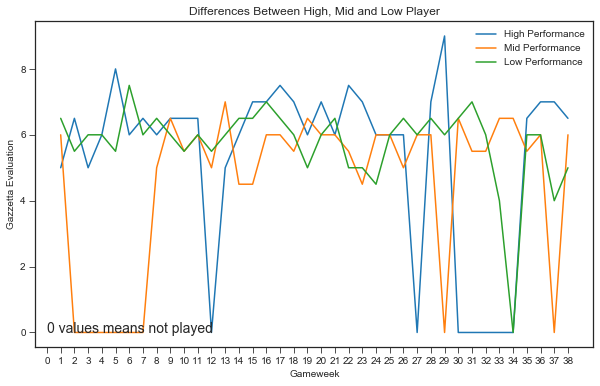

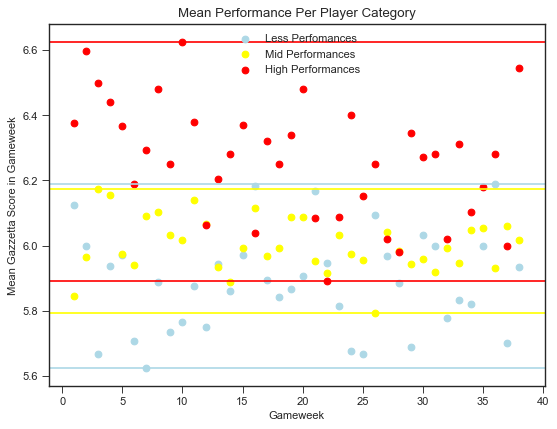

In [32]:
pa.plotDifferentPerformanceLevelOfPlayer(series, 11, 7.5, 4.5, 'Gazzetta')

The next plot is the one that compare a random distribution w.r.t. the normal distribution.

For each player we mantained the score distribution, the only modify we applyied is the shuffle of gamewweeks. This shuffle give a randomicity to the data.
Then we compute for each player the gameweek of the first best performance, then aggregating by gameweek we obtained a distribution. Using a min max scaler we normalize the distributions.

Is possible to notice that random distribution more or less follow the same path of the original distribution (is also visible from **dynamic time warping** computation). So is clear that is not possible to predict when a player could score a best performance.

#### Prameters:
1. the series computed
2. the name of the metrics used, Gazzetta if we use series, Playerrank if we use seriesRank
3. number of run (different random curve computation) need to be apply in order to deal with a original vs random comparison

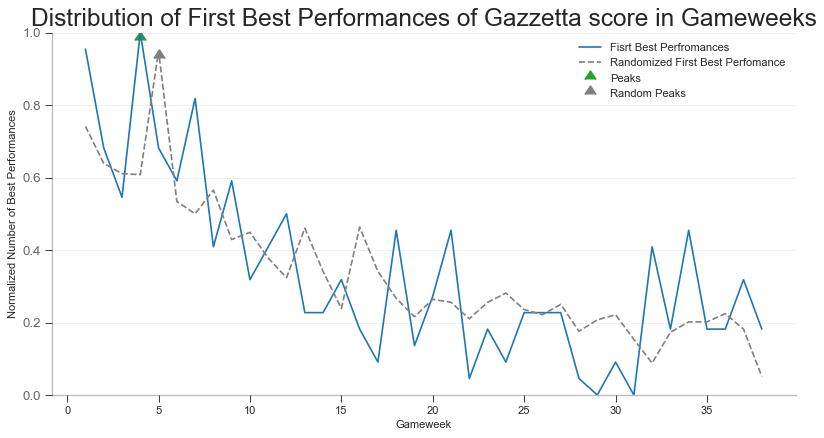

DTW computation between the two time series..
Time series 1 regarding number of first best performances
Time series 2 ragarding 5 run of shuffled perfomance w.r.t. number of first best perfomances
Only insertion Cost is keep..
Reallignment Cost :3.6363636363636367


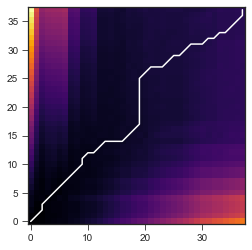

In [33]:
pa.distributionRandomEvolutionVsOriginalDistribution(series, 'Gazzetta',5)

## Test Randomicity of Best Performance (PLAYER RANK SCORE PART)

Foe the all players, we divided them into 3 different categories:
1. High Perfomance Players: those that have scored during the season at least a 8 as mark
2. Low Perfomance Players: those player that during season has scored at least a 4 as mark
3. Mid Perfomance Players: those players that didn't exeed the previous evaluation

A plot of a single player for each category is visible in the following cell.

Then for each category we plot the average score in each gameweek; analyzing the result came out that the mean of high performance players are always over the other two sets.

Mid performance players are the security, those players that more or less are close to sufficiency

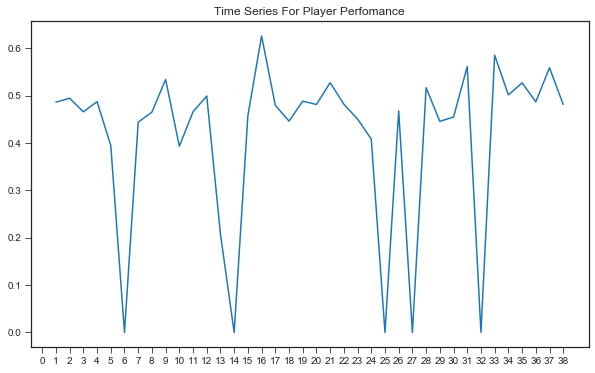

In [34]:
metrics = 'playerrank'
seriesRank = pa.createDataframeForMarkEvolution(df, metrics)
seriesRank[3323].plot(figsize=(10,6), xticks=range(0, 39), legend = False, title = 'Time Series For Player Perfomance')

Percentage of Less than 4.5 : 	 	0.2803738317757009
Percentage of Betw 4.5 and 7.5 : 	 0.5233644859813084
Percentage of Over 7.5 : 	 	0.19626168224299065
Lenght of high 21
Lenght of mid 56
Lenght of less 30


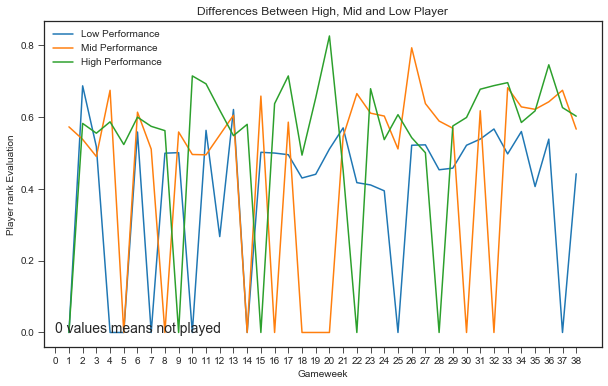

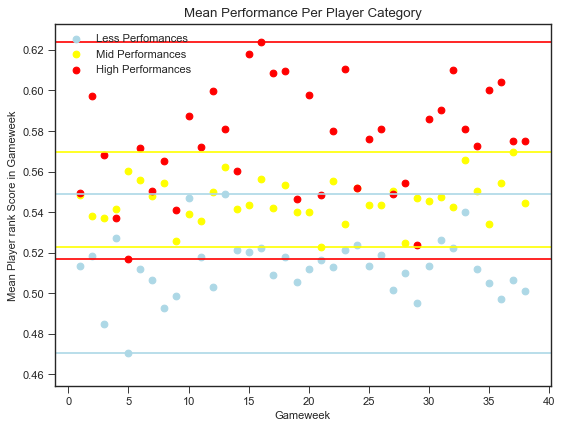

In [35]:
pa.plotDifferentPerformanceLevelOfPlayer(seriesRank, 11, 0.8, 0.4, 'Player rank')

The next plot represent the average impact in all the three player category of the scores, before and after the one with the highest impact. Is possible to see that, at exception with those days that player could not have played the path is more or less the same.

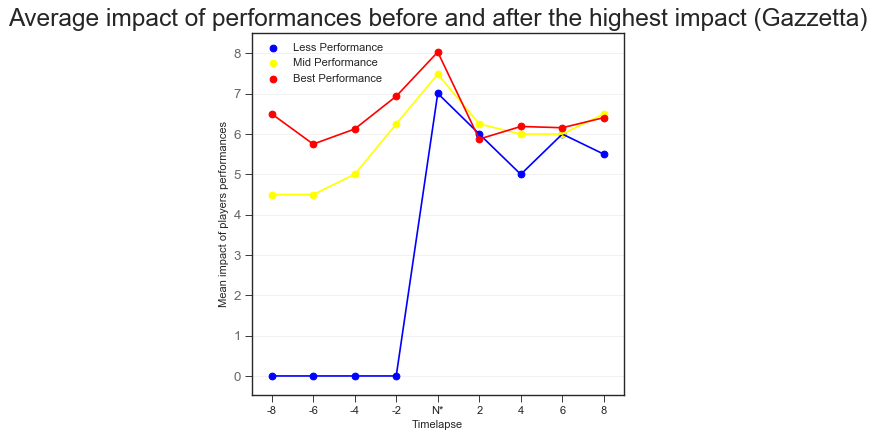

In [36]:
pa.plotBeforeandAfterHighestImpactInEachPlayerCategory(series, 13, 7.5, 4.5, 'Gazzetta')

The next plot is the one that compare a random distribution w.r.t. the normal distribution.

For each player we mantained the score distribution, the only modify we applyied is the shuffle of gamewweeks. This shuffle give a randomicity to the data.
Then we compute for each player the gameweek of the first best performance, then aggregating by gameweek we obtained a distribution. Using a min max scaler we normalize the distributions.

Is possible to notice that random distribution as path strange to the original distribution (is also visible from **dynamic time warping** computation more than 5.5).

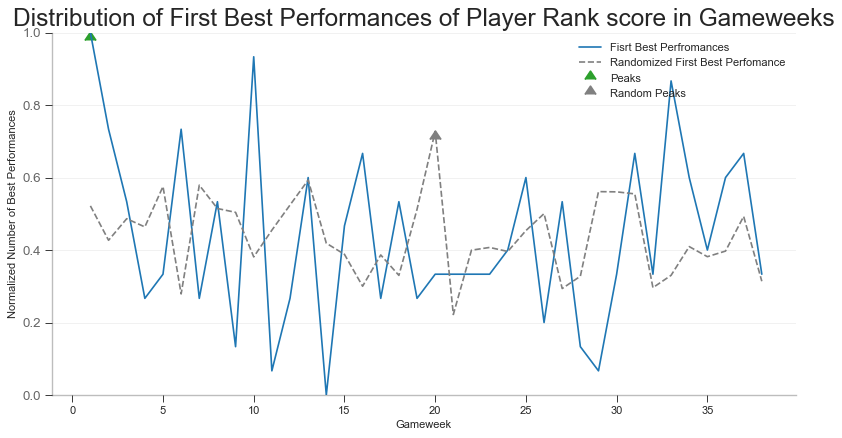

DTW computation between the two time series..
Time series 1 regarding number of first best performances
Time series 2 ragarding 10 run of shuffled perfomance w.r.t. number of first best perfomances
Only insertion Cost is keep..
Reallignment Cost :5.726822916666668


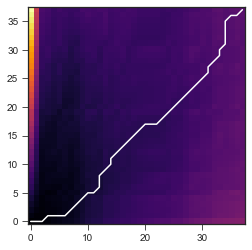

In [37]:
pa.distributionRandomEvolutionVsOriginalDistribution(seriesRank, 'Player Rank',10)

## Player Performance w.r.t Against Teams

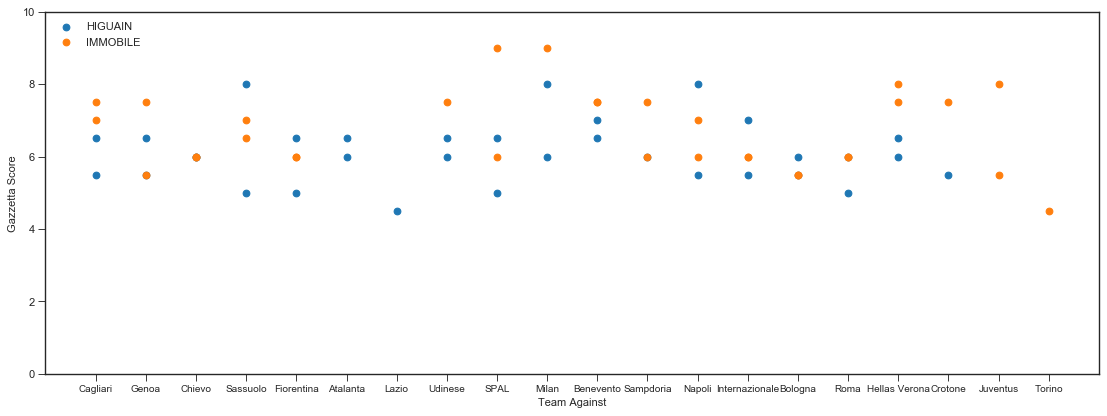

In [38]:
pa.plotTeamVersusPlayerPerformance(df,[3323, 21384], 'Gazzetta')

#### Distribution for each team of the number of against players best performances

For each team we compute the number of best perfomances for all the enemies pplayers. As expected the distribution follows a specific; the teams that has the most effective defense has a low number of against best performances 

#### Distribution for each team of the mean value for all against player's scores

For each team we compute the mean score for all the enemies players. The distribution is coherent with the leaderboard, the first 6/7 team are the ones where enemies player are evaluate in more severe way. Probably due to the strenght of the team.

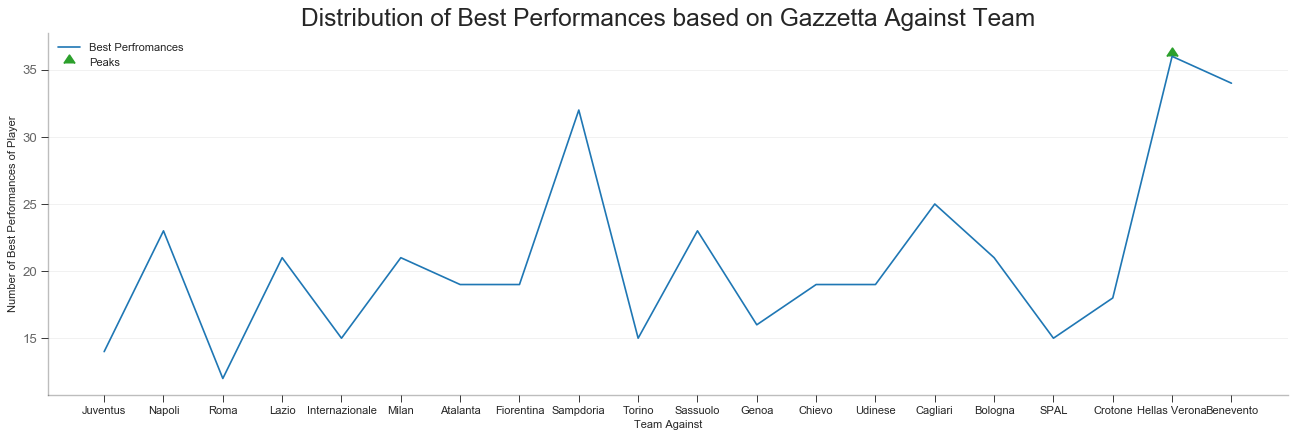

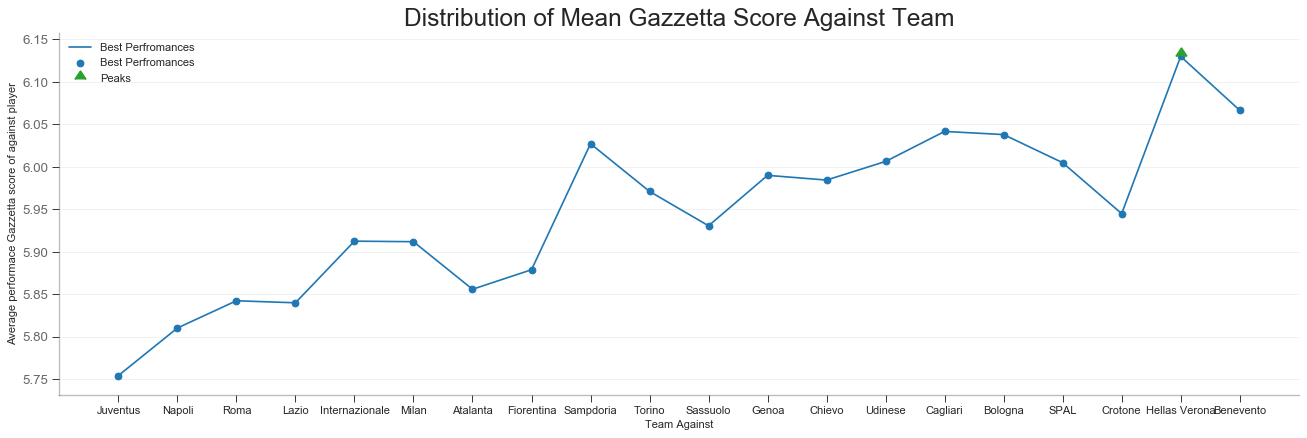

In [41]:
path = os.path.join(DATA_INTERNAL_FOLDER, 'matches_Italy.json')
pa.bestPerformanceAgainstTeamName(df, series, path, 'Gazzetta')